In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("preprocessed_dataset.csv")
df = df.set_index('date')

df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
!pip install -q evaluate

Metrics with different hyperparameter values

In [ ]:
import itertools
combinations = list(itertools.product([12,2*12,4*12],[64,2*64,3*64],[0.0005,0.001,0.005]))

from rnn_test import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('RNN')
for combination in combinations:
    base_model = RnnModel(df, unit_type="base", seq_len=combination[0], split_ratio=0.85, n_units=combination[1], lr=combination[2], mode='valid')
    base_model.train(epochs=50, batch_size=combination[0])

    mase_training = np.array(base_model.X_train)[:, -1, 1]
    mase_training = mase_training*base_model.stats[1,1] + base_model.stats[0,1]

    base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
    base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')

df_dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(df_dict)

df_results.to_csv('hyperparameter_results_RNN.csv')

In [ ]:
import itertools
combinations = list(itertools.product([12,2*12,4*12],[64,2*64,3*64],[0.0005,0.001,0.005]))

from rnn_test import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('LSTM')
for combination in combinations:
    base_model = RnnModel(df, unit_type="lstm", seq_len=combination[0], split_ratio=0.85, n_units=combination[1], lr=combination[2], mode='valid')
    base_model.train(epochs=50, batch_size=combination[0])

    mase_training = np.array(base_model.X_train)[:, -1, 1]
    mase_training = mase_training*base_model.stats[1,1] + base_model.stats[0,1]
    base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
    base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')

df_dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(df_dict)

df_results.to_csv('hyperparameter_results_LSTM.csv')

Testing with test partition

[48, 128, 0.001]
Epoch 1/50
30/30 [==============================] - 1s 13ms/step - loss: 0.3406
Epoch 2/50
30/30 [==============================] - 0s 12ms/step - loss: 0.2270
Epoch 3/50
30/30 [==============================] - 0s 13ms/step - loss: 0.1986
Epoch 4/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1923
Epoch 5/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1881
Epoch 6/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1814
Epoch 7/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1734
Epoch 8/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1770
Epoch 9/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1660
Epoch 10/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1505
Epoch 11/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1504
Epoch 12/50
30/30 [==============================] - 0s 11ms/step - loss: 0.1415
Epoch 13/50
30/30 [=

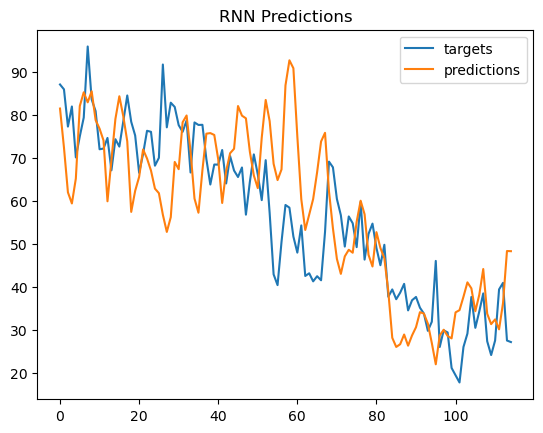

In [6]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_RNN.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load
from sklearn.metrics import mean_squared_error

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="base", seq_len=opt[0], split_ratio=0.85, n_units=opt[1], lr=opt[2], mode='test')
base_model.train(epochs=50, batch_size=opt[0])

mase_training = np.array(base_model.X_train)[:, -1, 1]
mase_training = mase_training*base_model.stats[1,1] + base_model.stats[0,1]
base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()

mase_forecast_power = [base_mase_results]
smape_forecast_power = [base_smape_metric]
mse_forecast_power = [mean_squared_error(base_model.validation_target, base_model.validation_predictions)]

for i in range(1,len(base_model.validation_predictions)):
    mase_forecast_power.append(mase_metric.compute(references=base_model.validation_target[:-i], predictions=base_model.validation_predictions[:-i], training=mase_training))
    smape_forecast_power.append(smape_metric.compute(references=base_model.validation_target[:-i], predictions=base_model.validation_predictions[:-i]))
    mse_forecast_power.append(mean_squared_error(base_model.validation_target[:-i], base_model.validation_predictions[:-i]))

df_dict = {'rnn_mase_forecast_power': mase_forecast_power[::-1], 'rnn_smape_forecast_power': smape_forecast_power[::-1], 'rnn_mse_forecast_power': mse_forecast_power[::-1]}
df_results = pd.DataFrame(df_dict)

df_results.to_csv('forecast_power_rnn.csv')

[24, 64, 0.001]
Epoch 1/50
60/60 [==============================] - 1s 3ms/step - loss: 0.3610
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2939
Epoch 3/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2673
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2477
Epoch 5/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2116
Epoch 8/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2096
Epoch 9/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2035
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1969
Epoch 11/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1981
Epoch 12/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1946
Epoch 13/50
60/60 [==============

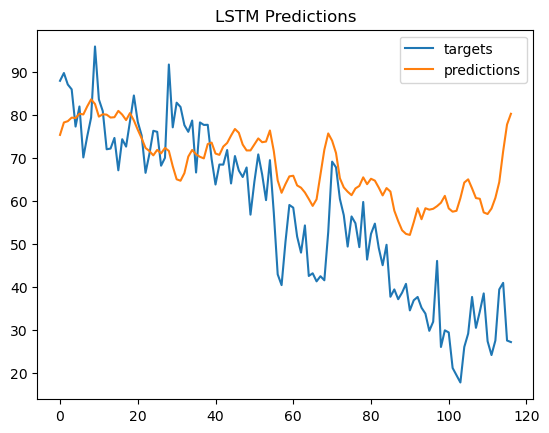

In [7]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_LSTM.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="lstm", seq_len=opt[0], split_ratio=0.85, n_units=opt[1], lr=opt[2], mode='test')
base_model.train(epochs=50, batch_size=opt[0])

mase_training = np.array(base_model.X_train)[:, -1, 1]
mase_training = mase_training*base_model.stats[1,1] + base_model.stats[0,1]
base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()

mase_forecast_power = [base_mase_results]
smape_forecast_power = [base_smape_metric]
mse_forecast_power = [mean_squared_error(base_model.validation_target, base_model.validation_predictions)]

for i in range(1,len(base_model.validation_predictions)):
    mase_forecast_power.append(mase_metric.compute(references=base_model.validation_target[:-i], predictions=base_model.validation_predictions[:-i], training=mase_training))
    smape_forecast_power.append(smape_metric.compute(references=base_model.validation_target[:-i], predictions=base_model.validation_predictions[:-i]))
    mse_forecast_power.append(mean_squared_error(base_model.validation_target[:-i], base_model.validation_predictions[:-i]))

df_dict = {'lstm_mase_forecast_power': mase_forecast_power[::-1], 'lstm_smape_forecast_power': smape_forecast_power[::-1], 'lstmmse_forecast_power': mse_forecast_power[::-1]}
df_results = pd.DataFrame(df_dict)

df_results.to_csv('forecast_power_lstm.csv')